Import basic libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score , accuracy_score , precision_score , recall_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

import superwised learning libraries

In [19]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [20]:
data = pd.read_csv("diabetes.csv")

In [21]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


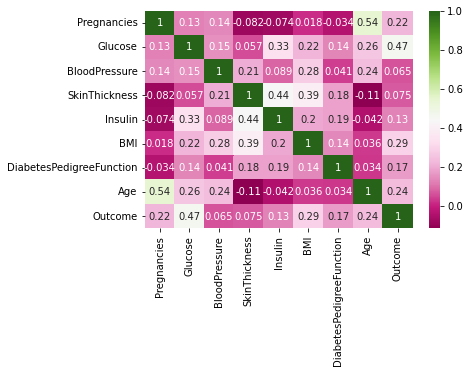

In [23]:
sns.heatmap(data.corr(),annot=True,cmap="PiYG")

In [24]:
x = data.drop(["Outcome"],axis=1)
y = data["Outcome"]

In [25]:
x.shape

(768, 8)

In [26]:
y.shape

(768,)

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.25)

# SVM

In [28]:
clf = SVC()
param = {"C":[1.5,2,3,4],"kernel":["linear","rbf","polynomial"]}
sr = RandomizedSearchCV(clf,param_distributions=param)
sr.fit(x_train,y_train)
sp = sr.best_estimator_.predict(x_test)
print(accuracy_score(y_test, sp))
print(f1_score(y_test, sp))
print(precision_score(y_test, sp))
print(recall_score(y_test, sp))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 1

0.7291666666666666
0.6285714285714286
0.6197183098591549
0.6376811594202898


# Logistic Regression

In [29]:
clf = LogisticRegression()
param = {"C":[1.5,2,3,4]}
sr = RandomizedSearchCV(clf,param_distributions=param)
sr.fit(x_train,y_train)
sp = sr.best_estimator_.predict(x_test)
print(accuracy_score(y_test, sp))
print(f1_score(y_test, sp))
print(precision_score(y_test, sp))
print(recall_score(y_test, sp))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

0.7291666666666666
0.6338028169014085
0.6164383561643836
0.6521739130434783


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


# AdaBoostClassifier



In [30]:
clf = AdaBoostClassifier()
param = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}
sr = RandomizedSearchCV(clf,param_distributions=param)
sr.fit(x_train,y_train)
sp = sr.best_estimator_.predict(x_test)
print(accuracy_score(y_test, sp))
print(f1_score(y_test, sp))
print(precision_score(y_test, sp))
print(recall_score(y_test, sp))

0.78125
0.6865671641791045
0.7076923076923077
0.6666666666666666


# Random Forest

In [31]:
clf = RandomForestClassifier()

param = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, x_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
sr = RandomizedSearchCV(clf,param_distributions=param)
sr.fit(x_train,y_train)
sp = sr.best_estimator_.predict(x_test)
print(accuracy_score(y_test, sp))
print(f1_score(y_test, sp))
print(precision_score(y_test, sp))
print(recall_score(y_test, sp))

0.7604166666666666
0.676056338028169
0.6575342465753424
0.6956521739130435
